# **TA #2 - Python version**

## Foundation of Econometrics - DSDM 2025-2026

**Lucia Sauer**

**Contact:** [lucia.sauer@bse.eu](mailto:lucia.sauer@bse.eu)

In this notebook we will review:

1. Conditional means
2. OLS in matrix algebra
3. OLS using R and Python preset functions
4. Plotting observations and fitted line
5. Numerical properties of OLS estimators


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wooldridge
sns.set(style="whitegrid", context="talk")


## **1. Conditional Means**
----



Using the `hprice1` dataset from the `wooldridge` package, we will explore the conditional mean of house prices given the number of bedrooms.




| Variable | Description                  |
| -------- | ---------------------------- |
| price    | House price ($1000s)         |
| assess   | Assessed value ($1000s)      |
| bdrms    | Number of bedrooms           |
| lotsize  | Lot size (square feet)       |
| sqrft    | House size (square feet)     |
| colonial | =1 if home is colonial style |
| lprice   | Log(price)                   |
| lassess  | Log(assess)                  |
| llotsize | Log(lotsize)                 |
| lsqrft   | Log(sqrft)                   |



In [2]:
df = wooldridge.data('hprice1')
df_grouped = df.groupby('bdrms')['price'].mean().reset_index()
df_grouped

,bdrms,price
0,2,251.250000
1,3,261.979167
2,4,285.163667
3,5,518.003571
4,6,310.000000
5,7,477.500000


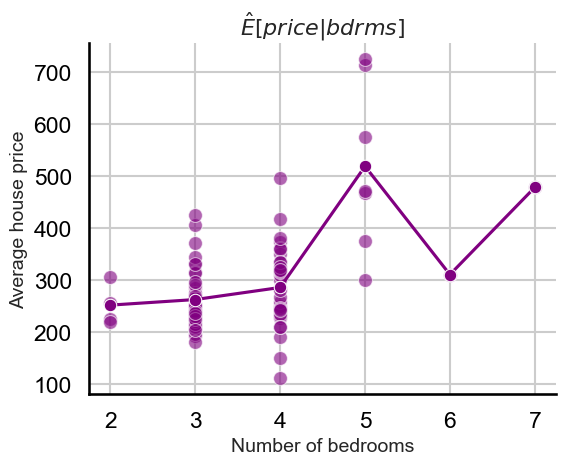

In [3]:
fig, ax = plt.subplots(figsize=(6,5))
sns.scatterplot(data=df, x='bdrms', y='price', color='purple', s=100, ax=ax, alpha=0.6, edgecolor='w')
sns.lineplot(data=df_grouped, x='bdrms', y='price', color='purple', marker='o', ax=ax)
ax.set_title(r'$\hat{E}[price | bdrms]$', fontsize=16)
ax.set_xlabel('Number of bedrooms', fontsize=14)
ax.set_ylabel('Average house price', fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# Set tick color to black
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", colors="black")
plt.tight_layout()
plt.show()

In [4]:
df.columns

Index(['price', 'assess', 'bdrms', 'lotsize', 'sqrft', 'colonial', 'lprice',
       'lassess', 'llotsize', 'lsqrft'],
      dtype='object')

## **2. OLS in Matrix Algebra**
----
Using the same dataset as before, we will estimate the following model:

$$price\_i = \beta_1 + \beta_2 \cdot bdrms_i  + \beta_3 \cdot sqrft_i + \beta_4 \cdot colonial_i + \epsilon_i $$

We can write this model in matrix form as:
$$ Y = X \beta + \epsilon $$

Where:
- $Y$ is a $n \times 1$ vector of the dependent variable (house price)
- $X$ is a $n \times k$ matrix of the independent variables (including a column of ones for the intercept)
- $\beta$ is a $k \times 1$ vector of coefficients




### **2.1 Estimate OLS coefficients using matrix algebra**

In [5]:
df['intercept'] = 1
X = df[['intercept', 'bdrms', 'sqrft', 'colonial']].values
y = df['price'].values

X_tX = X.T @ X
X_ty = X.T @ y
beta_hat = np.linalg.inv(X_tX) @ X_ty
print("Coefficients (beta_hat):",np.round(beta_hat,2))

Coefficients (beta_hat): [-21.55  12.49   0.13  13.08]


Fitted model:

$$\hat{price}_i = -21.55 + 12.49\cdot bdrms_i  + 0.13\cdot sqrft_i + 13.08\cdot colonial_i$$

where the dependent variable `price` is in **$1000s**.

### **2.2 Calculate Fitted values, SSE and R²**

In [6]:
y_hat =  X @ beta_hat
epsilon_hat = y - y_hat
SSE = epsilon_hat.T @ epsilon_hat
SST = (y - y.mean()).T @ (y - y.mean())
r2 = 1 - SSE / SST
print("(SSE):", SSE)
print("(R^2):", r2)

(SSE): 334982.9469173947
(R^2): 0.6350369859143851


Note: 
- The SSE is expressed in squared thousands of dollars.
- The R² is unitfree, and tells us that about 64% of the variation in house prices is explained by the model.

## **3. OLS using R and Python preset functions**
----
We can also estimate the same model using preset functions in Python and R.

- Python: `statsmodels` package
- R: `lm()` function


In [7]:
import statsmodels.api as sm
# Fit the model using statsmodels (OLS)
model = sm.OLS(y, X).fit()

# Print the coefficients and SSE
betas = model.params
y_hat = model.fittedvalues
epsilon_hat = model.resid
SSE = np.sum(epsilon_hat ** 2)
r2 = model.rsquared
print("Coefficients (betas):", np.round(betas, 2))
print("(SSE):", SSE)
print("(R^2):", r2)


Coefficients (betas): [-21.55  12.49   0.13  13.08]
(SSE): 334982.94691739464
(R^2): 0.6350369859143852


## **4. Plotting observations and fitted line**
----

For a simple model of $K=2$, estimate the model and plot the observations and the fitted line.

$$ price_i = \beta_1 + \beta_2 \cdot sqrft_i + \epsilon_i $$

In [8]:
#estimate the model

X = df[['intercept', 'sqrft']].values
y = df['price'].values
#using statsmodels
model = sm.OLS(y, X).fit()
betas = model.params
y_hat = model.fittedvalues
print("Coefficients (betas):", np.round(betas, 2))

Coefficients (betas): [11.2   0.14]


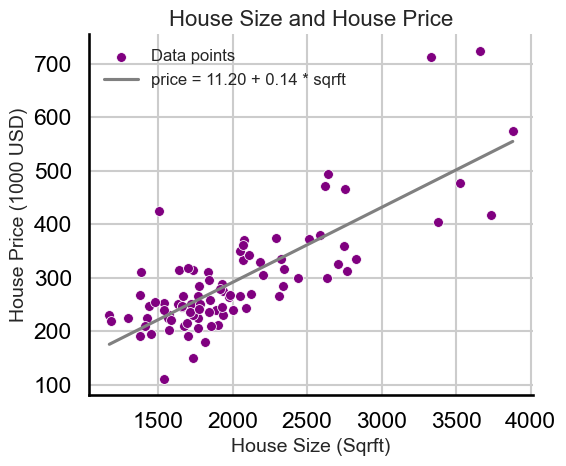

In [9]:
fig, ax = plt.subplots(figsize=(6,5))

# Scatter: data points
sns.scatterplot(x=df['sqrft'], y=df['price'], color='purple', s=50, ax=ax, label='Data points')

# Fitted line
sns.lineplot(x=df['sqrft'], y=y_hat, color='grey', ax=ax, label=f'price = {betas[0]:.2f} + {betas[1]:.2f} * sqrft')

# Titles and labels
ax.set_title('House Size and House Price', fontsize=16)
ax.set_xlabel('House Size (Sqrft)', fontsize=14)
ax.set_ylabel('House Price (1000 USD)', fontsize=14)

# Spine formatting
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")

# Tick formatting
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", colors="black")

# Legend
ax.legend(fontsize=12, frameon=False)

plt.tight_layout()
plt.show()


## **5. Numerical properties of OLS estimators:**
---


1. The sum of the residuals is zero:
$$\sum_i ^ n\hat{\epsilon}_i = \sum_i ^ n (y_i - \hat{y}_i)=0$$

on average, the residuals cancel out.


In [10]:
epsilon_hat = y - y_hat
print(epsilon_hat.sum().round(8))

-0.0


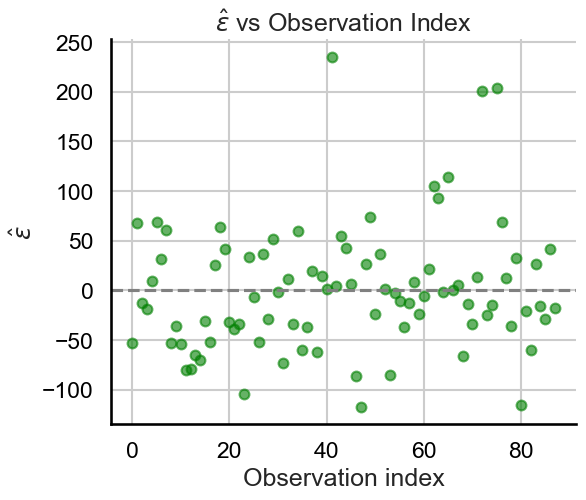

In [11]:
# 1) Residuals vs index (sum of residuals = 0)
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(range(len(epsilon_hat)), epsilon_hat, color='green', alpha=0.6, s=50)
plt.axhline(0, color='grey', linestyle='--') 
# Spine formatting
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")

# Tick formatting
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", colors="black") # horizontal line at 0
plt.xlabel('Observation index')
plt.ylabel(r'$\hat{\epsilon}$')
plt.title(r'$\hat{\epsilon}$ vs Observation Index')
plt.show()


2. The residuals are orthogonal to the fitted values:
$$\sum_i ^ n \hat{y}_i \hat{\epsilon}_i = 0$$


In [12]:
print(np.sum(y_hat * epsilon_hat).round(8))

-0.0


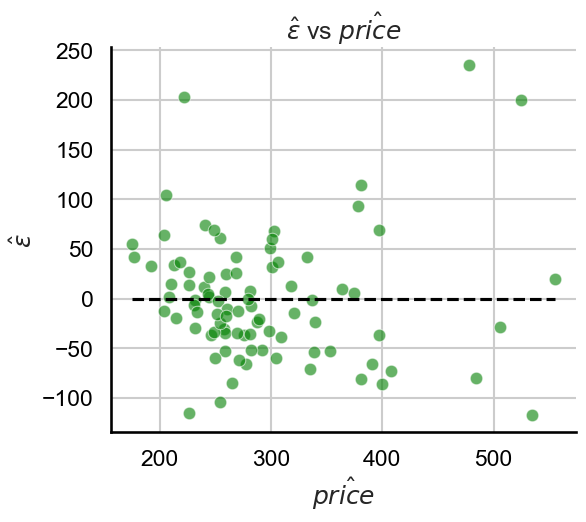

In [13]:
# 2) Residuals vs fitted values (residuals ⟂ fitted values)
fig, ax = plt.subplots(figsize=(6,5))
sns.scatterplot(x=y_hat, y=epsilon_hat, color='green', alpha=0.6, ax=ax)
sns.lineplot(x=y_hat, y=np.zeros_like(y_hat), color='black', linestyle='--', ax=ax)
# Spine formatting
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")

# Tick formatting
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", colors="black")
plt.xlabel(r'$\hat{price}$')
plt.ylabel(r'$\hat{\epsilon}$')
plt.title(r'$\hat{\epsilon}$ vs $\hat{price}$')
plt.show()

3. The residuals are orthogonal to each independent variable:
$$X' \hat{\epsilon} = 0$$

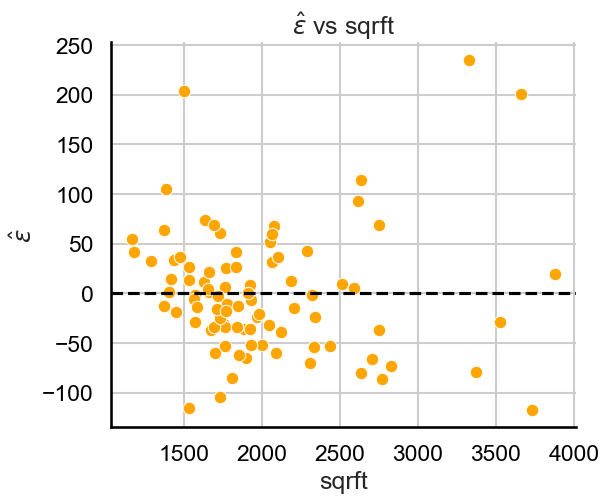

In [14]:
# 3) Residuals vs independent variable (residuals ⟂ X)
fig, ax = plt.subplots(figsize=(6,5))
sns.scatterplot(x=df['sqrft'], y=epsilon_hat, color='orange', ax=ax)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('sqrft')
plt.ylabel(r'$\hat{\epsilon}$')
plt.title(r'$\hat{\epsilon}$ vs sqrft')
# Spine formatting
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")

# Tick formatting
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", colors="black")
plt.show()

4. OLS unit dependent, hence SSE also unit dependent

Our dependent variable is expressed in \$1000s, so let's scale it to actual dollars and see how the SSE changes.


In [18]:
df['price_dollars'] = df['price'] * 1000
X_dollars = df[['intercept', 'sqrft']].values
y_dollars = df['price_dollars'].values
model_dollars = sm.OLS(y_dollars, X_dollars).fit()
betas_dollars = model_dollars.params
y_hat_dollars = model_dollars.fittedvalues
epsilon_hat_dollars = model_dollars.resid
SSE_dollars = np.sum(epsilon_hat_dollars ** 2)
r2_dollars = model_dollars.rsquared
print("SSE in dollars:", round(SSE_dollars, 2))
print("SSE in thousands of dollars:", round(SSE, 2))
print("Coefficients in dollars:", betas_dollars)
print("Coefficients in thousands of dollars:", betas)


SSE in dollars: 348053431609.34
SSE in thousands of dollars: 334982.95
Coefficients in dollars: [11204.14504705   140.21097729]
Coefficients in thousands of dollars: [11.20414505  0.14021098]
